In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("survey_results_public.csv")

In [96]:
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [97]:
df.ConvertedCompYearly.unique()

array([  62268.,      nan,   51552., ..., 4300000.,  160500.,  816816.])

In [98]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "Age", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Age,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",25-34 years old,62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",18-24 years old,NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",18-24 years old,NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,35-44 years old,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",25-34 years old,NaN


In [99]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Age,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",25-34 years old,62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,25-34 years old,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,25-34 years old,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,25-34 years old,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,25-34 years old,17748.0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46844 non-null  object 
 1   EdLevel       46823 non-null  object 
 2   YearsCodePro  46391 non-null  object 
 3   Employment    46831 non-null  object 
 4   Age           46735 non-null  object 
 5   Salary        46844 non-null  float64
dtypes: float64(1), object(5)
memory usage: 2.5+ MB


In [101]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Age             0
Salary          0
dtype: int64

In [102]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40133 entries, 9 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       40133 non-null  object 
 1   EdLevel       40133 non-null  object 
 2   YearsCodePro  40133 non-null  object 
 3   Age           40133 non-null  object 
 4   Salary        40133 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.8+ MB


In [103]:
df['Country'].value_counts()

United States of America                                9146
India                                                   3379
Germany                                                 2751
United Kingdom of Great Britain and Northern Ireland    2598
Canada                                                  1548
                                                        ... 
Dominica                                                   1
Libyan Arab Jamahiriya                                     1
Monaco                                                     1
Somalia                                                    1
Burundi                                                    1
Name: Country, Length: 166, dtype: int64

In [104]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [105]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                                                   10709
United States of America                                 9146
India                                                    3379
Germany                                                  2751
United Kingdom of Great Britain and Northern Ireland     2598
Canada                                                   1548
France                                                   1393
Brazil                                                   1339
Spain                                                     887
Netherlands                                               834
Australia                                                 824
Poland                                                    775
Italy                                                     755
Russian Federation                                        741
Sweden                                                    735
Turkey                                                    457
Switzerl

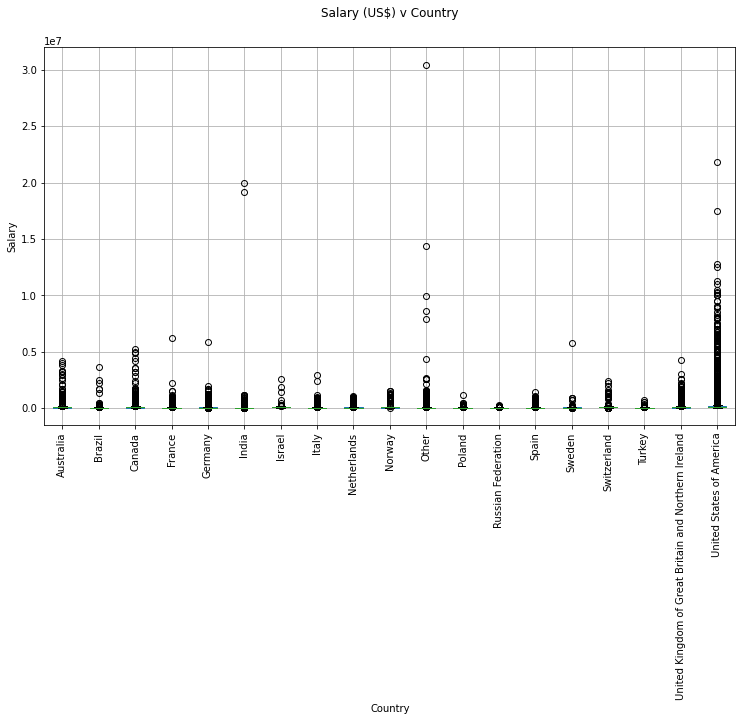

In [106]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [107]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

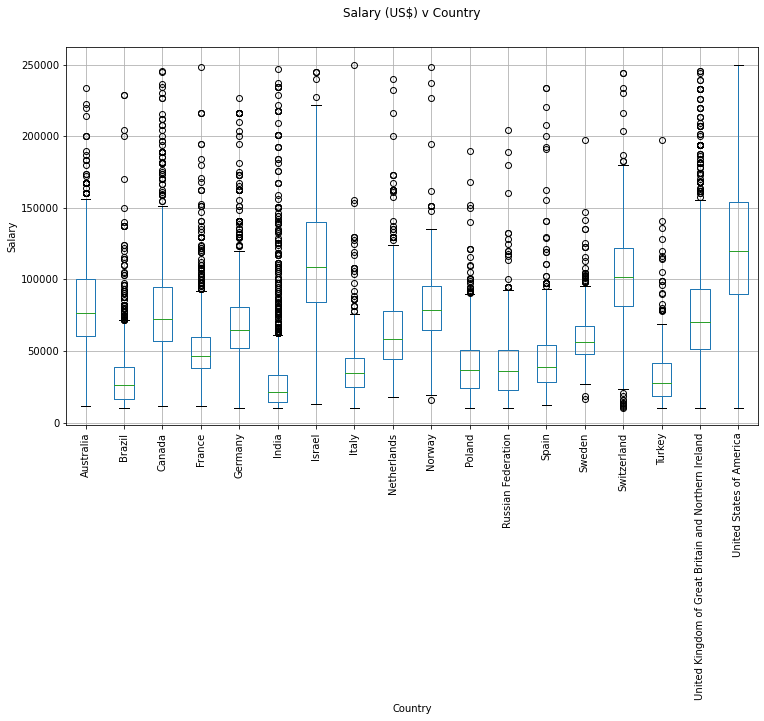

In [108]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [109]:
df["YearsCodePro"].unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '3', '15', '12', '8', '17', '1', '14', '26', '34', '11', '25',
       '24', '22', '13', '9', '7', '39', '20', '27', '23', '30', '19',
       '35', '33', '37', '43', '40', '29', '38', '31', '42', '28', '46',
       '32', '36', '47', '45', '44', '41', 'More than 50 years', '50',
       '49', '48'], dtype=object)

In [110]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [111]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [112]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [113]:
df["EdLevel"].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Post grad',
       'Less than a Bachelors'], dtype=object)

In [114]:
def clean_country(x):
    if 'United States' in x:
        return 'United States'
    elif 'United Kingdom' in x:
        return 'United Kingdom'
    else:
        return x
df['Country'] = df['Country'].apply(clean_country)

In [115]:
df.Age.unique()

array(['25-34 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '55-64 years old', '65 years or older',
       'Under 18 years old', 'Prefer not to say'], dtype=object)

In [68]:
from sklearn.preprocessing import LabelEncoder
le_age = LabelEncoder()
df['Age'] = le_age.fit_transform(df['Age'])
df['Age'].unique()

array([1, 2, 3, 0, 4, 5, 7, 6])

In [69]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()
#le.classes_

array([2, 0, 3, 1])

In [70]:
df['Country']

9               Sweden
11               Spain
12             Germany
16              Turkey
17              Canada
             ...      
83430    United States
83432           Canada
83434    United States
83436    United States
83438           Brazil
Name: Country, Length: 26179, dtype: object

In [71]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([13, 12,  4, 15,  2,  3, 14, 16, 11,  6, 17,  1,  7,  8, 10,  0,  5,
        9])

In [72]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [73]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [74]:
y_pred = linear_reg.predict(X)

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [76]:
error

41807.5473449429

In [77]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [78]:
y_pred = dec_tree_reg.predict(X)

In [79]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$29,944.93


In [80]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [81]:
y_pred = random_forest_reg.predict(X)

In [82]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$30,130.41


In [83]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [84]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$32,601.64


In [85]:
X

,Country,EdLevel,YearsCodePro,Age
9,13,2,4.0,1
11,12,0,5.0,1
12,4,2,6.0,1
16,15,0,2.0,1
17,2,0,6.0,1
...,...,...,...,...
83430,17,2,21.0,3
83432,2,0,0.5,0
83434,17,0,5.0,1
83436,17,1,4.0,1


In [86]:
# country, edlevel, yearscode
X = np.array([["United States", 'Master’s degree', 15, "25-34 years old"]])
X

array([['United States', 'Master’s degree', '15', '25-34 years old']],
      dtype='<U15')

In [87]:
y

9         51552.0
11        46482.0
12        77290.0
16        17748.0
17        46135.0
           ...   
83430    125000.0
83432     80169.0
83434    160500.0
83436     90000.0
83438     21168.0
Name: Salary, Length: 26179, dtype: float64

In [88]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X[:, 3] = le_age.transform(X[:, 3])
X = X.astype(float)
X

array([[17.,  2., 15.,  1.]])

In [89]:
y_pred = regressor.predict(X)
y_pred

array([151587.62643678])

In [90]:
import pickle

In [91]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education, "le_age":le_age}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [92]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]
le_age = data['le_age']

In [93]:
y_pred = regressor_loaded.predict(X)
y_pred

array([151587.62643678])